In [152]:
import numpy as np
from scipy.stats import *
from sympy import *
from IPython.display import Math
from scipy import optimize
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import re

def rrstr(x,n): # округление до n знаков после запятой
    fmt = '{:.'+str(n)+'f}'
    return fmt.format(x).replace('.',',')

v_rrstr = np.vectorize(rrstr)

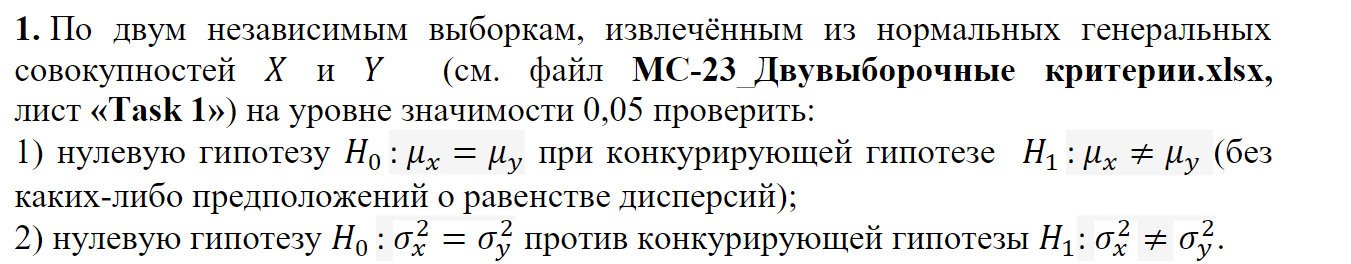

In [153]:
df = pd.read_excel('МС-23_Двухвыборочные критерии.xlsx')
dfab = df[['A','B']].dropna()
x,y = df['A'].dropna(), df['B'].dropna()
alpha = 0.05

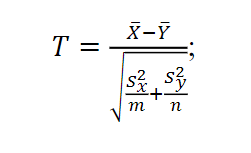

In [154]:
x_sr = x.mean()
y_sr = y.mean()
s2_x = x.var(ddof=1)
s2_y = y.var(ddof=1)
m = x.size
n = y.size

T = (x_sr - y_sr)/(s2_x/m + s2_y/n)**0.5
T

-2.291019722050651

In [155]:
t1 = s2_x/m
t2 = s2_y/n

In [156]:
k = (t1 + t2)**2/(t1**2/(m-1)+t2**2/(n-1))
k

120.88095012575985

In [157]:
t_cr = t.isf(alpha/2,k)
t_cr

1.9797834552476496

In [158]:
if abs(T)>t_cr:
    display(Math("Отвергаем нулевую гипотезу H0 в пользу альтернативной H_1.".replace(' ','~')))
else:
    display(Math("Не хватает оснований отвергнуть нулевую гипотезу H_0.   ".replace(' ','~')))

<IPython.core.display.Math object>

In [159]:
p_val = 2* (t.sf(abs(T),k))
p_val

0.02369418337285211

In [160]:
if p_val<alpha:
    display(Math("Отвергаем нулевую гипотезу H0 в пользу альтернативной H_1.".replace(' ','~')))
else:
    display(Math("Не хватает оснований отвергнуть нулевую гипотезу H_0.   ".replace(' ','~')))

<IPython.core.display.Math object>

In [161]:
ttest_ind(df['A'].dropna(),df['B'].dropna(), equal_var=False)

TtestResult(statistic=-2.2910197220506507, pvalue=0.02369418337285214, df=120.88095012575988)

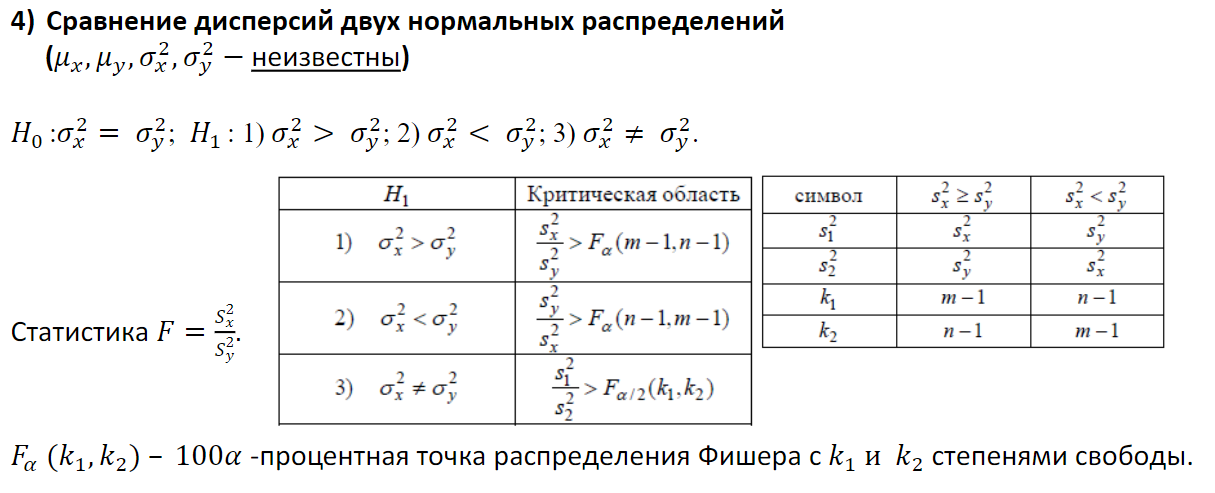

In [162]:
F = s2_x/s2_y
if s2_x>s2_y:
    k1 = n-1
    k2 = m-1
else:
    F = 1/F
    k2 = n-1
    k1 = m-1  
f_cr = f.ppf(1 - alpha/2, k1,k2)

if F>f_cr:
    display(Math("Отвергаем нулевую гипотезу H0 в пользу альтернативной H_1.".replace(' ','~')))
else:
    display(Math("Не хватает оснований отвергнуть нулевую гипотезу H_0.   ".replace(' ','~')))

<IPython.core.display.Math object>

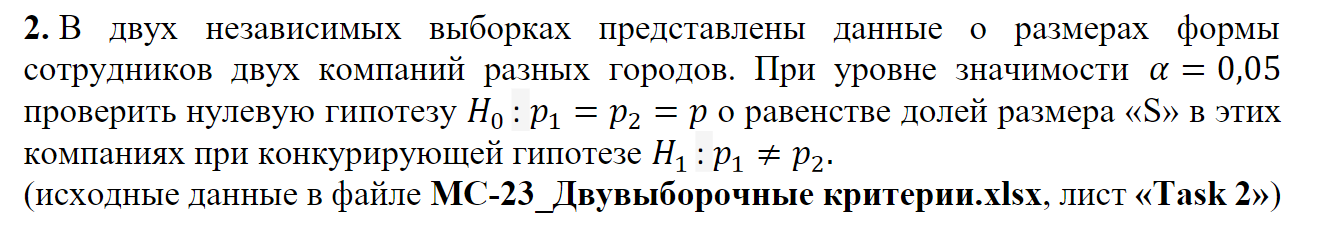

In [163]:
df = pd.read_excel('МС-23_Двухвыборочные критерии.xlsx','Task 2')
display(df)

,I,II
0,XL,M
1,L,XXL
2,L,M
3,NaN,S
4,XL,XXL
...,...,...
268,NaN,M
269,NaN,S
270,NaN,XL
271,NaN,L


In [164]:
x,y = df.I.dropna(), df.II.dropna()

n1 = x.size
n2 = y.size

alpha = 0.05

In [165]:
x.unique()

array(['XL', 'L', 'S', 'XXL', 'M'], dtype=object)

In [166]:
y.unique()

array(['M', 'XXL', 'S', 'L', 'XL'], dtype=object)

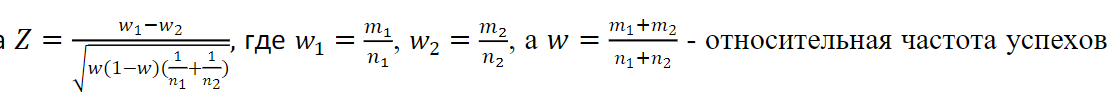

In [167]:
w1 = (x.value_counts()/x.size)['S']
w2 = (y.value_counts()/y.size)['S']
w1,w2

(0.22274881516587677, 0.16666666666666666)

In [168]:
w = ((y.value_counts())['S'] + (x.value_counts())['S'])/(x.size + y.size)
w

0.1925601750547046

In [169]:
Z = (w1 - w2)/np.sqrt(w*(1-w)*(1/n1 + 1/n2))
Z

1.5157829061671806

In [170]:
z_cr = norm.isf(alpha/2)
if Z>z_cr:
    display(Math("Отвергаем нулевую гипотезу H0 в пользу альтернативной H_1.".replace(' ','~')))
else:
    display(Math("Не хватает оснований отвергнуть нулевую гипотезу H_0.   ".replace(' ','~')))

<IPython.core.display.Math object>

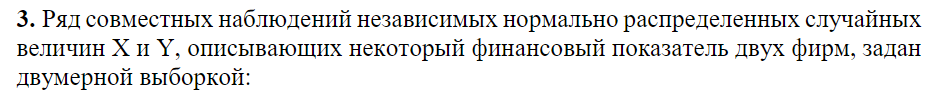

In [171]:
dic = '{(167.9, -225.541); (133, -227.0618); (172.4, NA); (114.4, -187.947); (182.1, NA); (146.6, -238.1706); (NA, -195.6855); (157.5, -226.3498); (163.1, -232.4315); (164.6, -219.3768); (139.1, -205.4677); (112.9, NA); (149.6, -221.0258); (166.8, -190.341); (153.8, -219.2795); (NA, -198.8605); (87.5, -207.1957); (175.2, NA); (198.5, -277.6407); (147.7, -215.5379); (186, -209.1277); (150.9, -252.0035); (178.7, -221.1615); (143.3, -264.381); (148, -200.406); (NA, -291.3722); (184.8, -209.8789); (151.5, NA); (151.3, NA); (159.8, -261.9098); (124.5, -248.9302); (140, NA); (164.7, NA); (186.4, -255.7522); (154.5, -259.0014); (182.9, -222.0292); (112.8, -209.1327); (132.1, -224.1615); (180.5, -178.7437); (141.6, -261.1121); (157.8, -247.9286); (211, -209.7416); (136.9, -241.0031); (124.6, -276.8816); (109.4, -233.4274); (162.9, -235.5742); (130.8, NA); (187.5, -231.0311); (183.5, -232.3752); (193.9, -188.5517); (165, -257.8477); (184.5, -236.9394); (164.4, -225.4218); (166.1, -216.091); (241.3, -197.7659); (141.8, -219.751); (NA, -207.4731); (NA, -240.3647); (NA, -258.889); (136.6, -217.16); (194.5, -261.1401); (157.6, NA); (149.6, -213.3036); (152.5, -288.5258); (170.4, -241.9711); (NA, -243.0995); (133.6, -232.4539); (139.1, -214.5584); (111.7, NA); (138.1, -271.9439); (166.3, -204.7177); (185.6, NA); (160.4, -229.6342); (152.4, -237.8129); (197.6, -207.0127); (149.8, NA); (180.7, -215.8441); (156.1, -221.4436); (130.5, -286.4889); (140, -235.5511); (NA, -229.0371); (143.1, -257.7442); (177.6, -220.4417); (124.7, -256.3137); (142, -218.7544); (143.6, -260.6194); (121.3, -186.2013); (78.2, -173.376); (155.9, -261.1379); (137.6,-237.259); (170.8, -204.3441); (156.8, -212.3563); (128.4, -200.0559); (NA, -238.497); (129.3, -238.3039); (147.1, -257.0837); (117.9, -205.2149); (174.3, -247.1452); (163.2, -194.3524); (151.5, -219.2332); (153.3, -192.9653); (148.4, -215.8789); (174.8, -205.3518); (84.2, -197.7495); (163.6, -227.4809); (205.5, -250.75); (169.8, -211.6129); (NA, -188.3579); (116.9, NA); (205.5, -180.5642); (181.1, -195.1596); (137.4, -222.561); (140.5, -255.2292); (125, -221.2531); (212.9, -196.9889); (152.7, -200.074); (137.4, NA); (142.8, -201.6862); (178.4, -232.8285); (165.1, -208.838); (NA, -240.8741); (134.3, -224.8478); (180.5, -229.5657); (122.8, -204.9998); (179.7, -272.7181); (163.8, -239.3508); (182.2, -232.8887); (172.8, -220.529); (NA, -221.5642); (NA, -195.5116); (151, -222.4601); (NA, -256.248); (204.2, -230.9828); (182.9, -234.9166); (219.3, -198.5935); (153.4, NA); (85.1, -201.3523); (214.6, -226.9573); (96.2, -245.2855); (153, -261.5914); (112.8, -212.7011); (NA, -244.1466); (NA, -213.4919); (153.3, -239.8558); (177.6, -272.8503); (158.6, -314.0774); (NA, -249.3596); (162.3, -216.9371); (123.8, -197.6739); (158.3, -235.9429)}'
################################################################################################################################################################################
alpha = 0.05
alternative = 'greater' # from ['two-sided','less','greater']
################################################################################################################################################################################

# Извлечение пар значений
pairs = re.findall(r'\(([^,]+), ([^)]+)\)', dic)

# Преобразование в DataFrame
df = pd.DataFrame(pairs, columns=["Column 1", "Column 2"])

# Вывод таблицы
some_list = []
for i in range(df.shape[0]):
    if not(df.iloc[i,0] == 'NA' or df.iloc[i,1] == 'NA'):
        some_list.append([df.iloc[i,0],df.iloc[i,1]])
df = pd.DataFrame(np.array(some_list).astype(float), columns=["X", "Y"])


pear_corr ,pearson_p_val = pearsonr(df['X'],df['Y'])

display(Math('1. Введите выборочный коэффициент корреляции Пирсона между X и Y: '.replace(' ','~') + str(pear_corr)))


# 2.1 Проверка гипотезы о равенстве средних значений (альтернатива: среднее больше у X)
t_stat, p_value_means = ttest_ind(df['X'], df['Y'], alternative=alternative, equal_var=False)
display(Math(f"2.1 Введите значение P-value в проверке гипотезы о равенстве средних значений показателей фирм при альтернативной гипотезе о том, что среднее значение показателя больше у первой фирмы (без каких-либо предположений о равенстве дисперсий): ".replace(' ','~') + str(rrstr(p_value_means,200))))

# 2.2 Проверка гипотезы на уровне значимости alpha
mean_test_result = int(p_value_means < alpha)
display(Math(f"2.2 На уровне значимости {alpha} можно ли утверждать, что среднее значение показателя больше у первой фирмы? Введите 1 - если да, и 0 - если нет: {mean_test_result}".replace(' ','~')) )

# 3.1 Проверка гипотезы о равенстве дисперсий
f_stat, p_value_variances = bartlett(df['X'], df['Y'])
display(Math(f"3.1 Введите значение P-value в проверке гипотезы о равенстве дисперсий показателей двух фирм при альтернативной гипотезе об их неравенстве: {p_value_variances}".replace(' ','~')) )

# 3.2 Проверка гипотезы на уровне значимости 0.05
variance_test_result = int(p_value_variances < 0.05)
display(Math(f"3.2 На уровне значимости 0.05 можно ли утверждать, что дисперсии показателей фирм различны? Введите 1 - если да, и 0 - если нет: {variance_test_result}".replace(' ','~')) )

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
def one_rrstr(x,n=0): # округление до n знаков после запятой
    if n == 0:
        return str(x)
    fmt = '{:.'+str(n)+'f}'
    return fmt.format(x).replace('.',',')

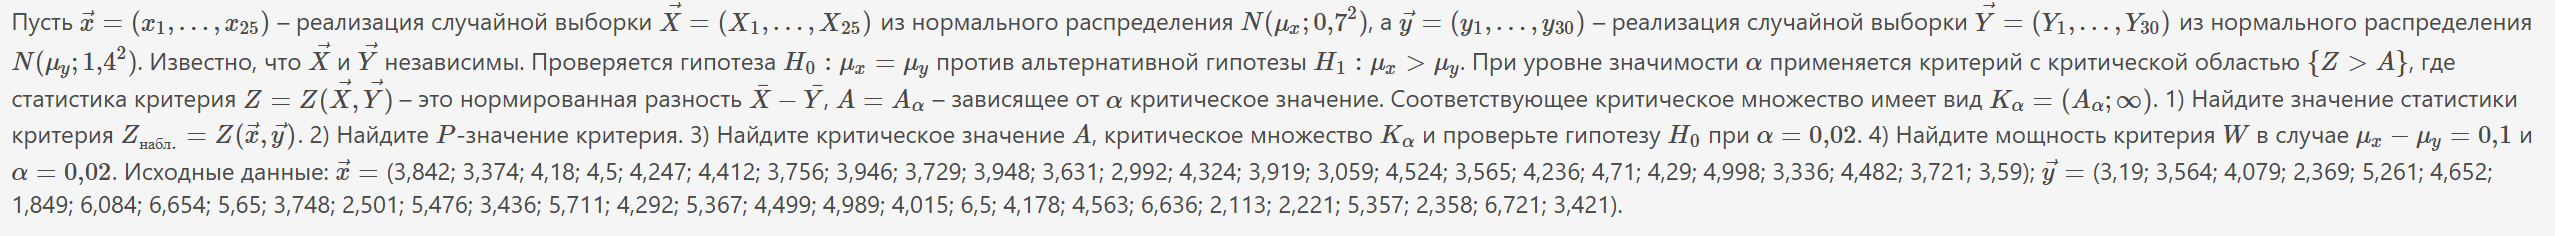

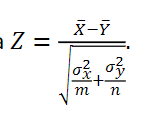

In [14]:
import numpy as np
from scipy.stats import norm

# Исходные данные
x = np.array([3.842, 3.374, 4.18, 4.5, 4.247, 4.412, 3.756, 3.946, 3.729, 3.948,
              3.631, 2.992, 4.324, 3.919, 3.059, 4.524, 3.565, 4.236, 4.71, 4.29,
              4.998, 3.336, 4.482, 3.721, 3.59])
y = np.array([3.19, 3.564, 4.079, 2.369, 5.261, 4.652, 1.849, 6.084, 6.654, 5.65,
              3.748, 2.501, 5.476, 3.436, 5.711, 4.292, 5.367, 4.499, 4.989, 4.015,
              6.5, 4.178, 4.563, 6.636, 2.113, 2.221, 5.357, 2.358, 6.721, 3.421])

sigma_x = 0.7  # Стандартное отклонение X
sigma_y = 1.4  # Стандартное отклонение Y
alpha = 0.02   # Уровень значимости

n_x = len(x)
n_y = len(y)

# Средние значения выборок
x_mean = np.mean(x)
y_mean = np.mean(y)

# 1. Значение статистики Z
z_obs = (x_mean - y_mean) / np.sqrt((sigma_x**2 / n_x) + (sigma_y**2 / n_y))
print(f"Значение статистики Z_набл.: {z_obs:.3f}")

# 2. P-значение
p_value = 1 - norm.cdf(z_obs)
print(f"P-значение критерия: {p_value:.3f}")

# 3. Критическое значение A
z_crit = norm.ppf(1 - alpha)
print(f"Критическое значение A: {z_crit:.3f}")

# Критическое множество
print(f"Критическое множество Kα: ({z_crit:.3f}; ∞)")

# Проверка гипотезы
if z_obs > z_crit:
    print("Гипотеза H0 отвергается в пользу H1.")
else:
    print("Нет оснований отвергнуть гипотезу H0.")

# 4. Мощность критерия W
delta = 0.1  # Разность средних для мощности
z_alt = (delta) / np.sqrt((sigma_x**2 / n_x) + (sigma_y**2 / n_y))
w = 1 - norm.cdf(z_crit - z_alt)
print(f"Мощность критерия W: {w:.3f}")
y_mean

Значение статистики Z_набл.: -1.405
P-значение критерия: 0.920
Критическое значение A: 2.054
Критическое множество Kα: (2.054; ∞)
Нет оснований отвергнуть гипотезу H0.
Мощность критерия W: 0.044


4.3818

In [26]:
def TSTA_1(text_x,text_y,sigma_x,sigma_y,alpha,delta,splitter = ';',locale = 'rus'):
    """
    Сравнение ГЕНЕРАЛЬНЫХ СРЕДНИХ при ИЗВЕСТНОЙ ДИСПЕРСИИ
    
    Пусть X- =(x1,…,x_m) - реализация случайной выборки X =(X1,…,X_m) из нормального распределения N(μ_x; `sigma_x`),
    а Y- =(y1,…,y_n) - реализация случайной выборки Y =(Y1,…,Y_n) из нормального распределения N(μ_y; `sigma_y`).
    Известно, что X и Y независимы. Проверяется гипотеза H0: μ_x = μ_y против альтернативной гипотезы H1: μ_x > μ_y.
    При уровне значимости α применяется критерий с критической областью {Z>A}, где статистика критерия
    Z = Z(X, Y) - это нормированная разность X- - Y-,
    A = A_α -  зависящее от α критическое значение. Соответствующее критическое множество имеет вид K_α =(A_α; ∞).
    
    - Найдите значение статистики критерия Z_набл.= Z(X-, Y-).
    - Найдите P-значение критерия.
    - Найдите критическое значение A, критическое множество K_α и проверьте гипотезу H0 при α = `alpha`.
    - Найдите мощность критерия W в случае μx - μy = `delta` и α = `alpha`.
    
    Исходные данные:
    
    X- = `text_x`
    Y- = `text_y`

    Args:
        text_x (str): Строка перечисления всех чисел, данных как X-
        text_y (str): Строка перечисления всех чисел, данных как Y-
        sigma_x (numerical): Значение стандартного отклонения X
        sigma_y (numerical): Значение стандартного отклонения Y
        alpha (numerical): Уровень значимости
        delta (numerical): Разность между математическими ожиданиями для подсчета W
        splitter (str, optional): Разделитель между каждым значением в `text_x` и `text_y`. Стандартно равно =  ';'.
        locale (str, optional): Локализция данных - если целая и дробная часть каждого числа из `text разделена не запятой, то нужно изменить значение этого параметра на любое другое. Стандартно равно =  'rus'.

    ## Prints
        `answer` каждое значение последовательно.<br>C запятой вместо точки и сокращенное до соответствующего количества десятичных знаков.

    ## Returns:
        `answer` (tuple): Соответствующие значения
    """
    from scipy.stats import norm

    # Взять данные из строки
    if locale== 'rus':
        x = np.array(text_x.replace(',','.').split(splitter)).astype(float)
        y = np.array(text_y.replace(',','.').split(splitter)).astype(float)
    else:
        x = np.array(text_x.split(splitter)).astype(float)
        y = np.array(text_y.split(splitter)).astype(float)


    x_sr = x.mean()
    y_sr = y.mean()
    m = x.size
    n = y.size

    # Значение статистики Z
    z_obs = (x_sr - y_sr)/(sigma_x**2/m + sigma_y**2/n)**0.5

    # P-значение
    p_value = 1 - norm.cdf(z_obs)

    # Критическое значение A
    z_crit = norm.ppf(1 - alpha)

    # Мощность критерия W
    z_alt = (delta) / np.sqrt((sigma_x**2 / n_x) + (sigma_y**2 / n_y))
    w = 1 - norm.cdf(z_crit - z_alt)



    print('Значение статистики критерия = ' + one_rrstr(z_obs,3))
    print('P-значение критерия = ' + one_rrstr(p_value,3))
    print('Критическое значение А = ' + one_rrstr(z_crit,3))
    print('Мощность критерия = ' + one_rrstr(w,3))

    # Проверка гипотезы
    if z_obs > z_crit:
        print("Гипотеза H0 отвергается в пользу H1.")
    else:
        print("Нет оснований отвергнуть гипотезу H0.")
        
    return (Z, p_value, z_crit, w)

text_x = '3,842; 3,374; 4,18; 4,5; 4,247; 4,412; 3,756; 3,946; 3,729; 3,948; 3,631; 2,992; 4,324; 3,919; 3,059; 4,524; 3,565; 4,236; 4,71; 4,29; 4,998; 3,336; 4,482; 3,721; 3,59'
text_y = '3,19; 3,564; 4,079; 2,369; 5,261; 4,652; 1,849; 6,084; 6,654; 5,65; 3,748; 2,501; 5,476; 3,436; 5,711; 4,292; 5,367; 4,499; 4,989; 4,015; 6,5; 4,178; 4,563; 6,636; 2,113; 2,221; 5,357; 2,358; 6,721; 3,421'

sigma_x = 0.7
sigma_y = 1.4
alpha = 0.02
delta = 0.1  # Разность средних для мощности

splitter = ';'
locale = 'rus'


TSTA_1(text_x,text_y,sigma_x,sigma_y,alpha,delta)

Значение статистики критерия = -1,405
P-значение критерия = 0,920
Критическое значение А = 2,054
Мощность критерия = 0,044
Нет оснований отвергнуть гипотезу H0.


(-1.4046441651782242,
 0.9199364416984964,
 2.0537489106318225,
 0.043575905243082746)